# Projet Final

![Alt text](images/Image6.jpeg)


## Overview

Nan kad travay sa nou bral eseye gade nn ki pi bon mak Avyon konpayi an ka envesti. Pou sa nou bral realize yon ansanm de analiz sou yon dataset ki soti nn the __"National Transportation Safety Board"__ ki pran an kont aksidan avyon ki rive nn mond lan soti 1962 rive 2023. Pou nou arive ak fen sa, nap itilize kom zouti de baz Python ki se yn langaj de pwogramasyon, nap itilize tou kek teknik statistik pou nou arive tire konklizyon nou an. Pou fini nap prezante yon Tablo de bo, kap konpile kek graf ki gen pou finalite ede deside yo pran yon pi bon desizyon.


## Business Problem

![Alt text](images/Image4.jpeg)


The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. We are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. We must then translate our findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Data Uderstanding

![Alt text](images/Image7.jpeg)

The data is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In [2]:
# Ann enpote pakej nap gen bezwen nn travay la.
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns


In [3]:
# Nap enpote data set lan.
df = pd.read_csv('data/Aviation_Data.csv')
df.head()

C:\Users\Calixte\AppData\Local\Temp\ipykernel_18156\3388758982.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Nap gade dimansyon dataset lan.
df.shape

(90348, 31)

In [5]:
# Nap eksplore kolon dataset lan.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Nap eksplore data nimerik ki nn dataset nou an.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
# Nap gade sin gen data ki repete
print(df.duplicated().sum())

1390


In [8]:
# Nap gade konbyen data nil nou genyen nn dataset nou an (%).
df.isnull().sum()/len(df)*100

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.512330
Airport.Name              41.665560
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

In [9]:
# Nap retire liy ki repete yo.
df = df.drop_duplicates(subset=['Event.Id'])
df.shape

(87952, 31)

In [10]:
# Nap verifye rezilta liy kod anle a
print(df.duplicated().sum())

0


In [11]:
# N ap retire kolòn ki gen plis pase 30% done ki manke, men n ap kenbe [Broad.phase.of.flight] paske nap bezwen l nan analiz nou an. 
df = df.drop(['FAR.Description','Schedule','Air.carrier','Latitude','Longitude','Airport.Code','Airport.Name','Aircraft.Category'],axis=1)
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [12]:
# Nap revizyalize data nou an avek nonb kolon redui yo.
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [13]:
# Nap eseye gade ki kantite vale nil kek kolon genyen.
print(df['Broad.phase.of.flight'].isna().sum())
print(df['Purpose.of.flight'].isna().sum())
print(df['Purpose.of.flight'].isna().sum())
print(df['Model'].isna().sum())
print(df['Make'].isna().sum())

27115
6123
6123
93
64


In [14]:
# Nap efase data nil yo nn kolon 'Broad.phase.of.flight' lan.
df = df.dropna(subset='Broad.phase.of.flight')
df.shape

(60837, 23)

In [15]:
print(df['Broad.phase.of.flight'].isna().sum())
print(df['Purpose.of.flight'].isna().sum())
print(df['Purpose.of.flight'].isna().sum())
print(df['Model'].isna().sum())
print(df['Make'].isna().sum())

0
1047
1047
30
11


In [16]:
# Nap verifye si nou gen done nil nn kolon idantifyan inik lan.
print(df['Event.Id'].isna().sum())

0


In [17]:
# Nou ajoute yon nouvo kolon nn dataset lan kap anglobe diferan nivo blesi yo.
df['Number of Injured'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']+df['Total.Minor.Injuries']
df['Number of Injured'].head()

0    2.0
1    4.0
2    NaN
3    2.0
4    NaN
Name: Number of Injured, dtype: float64

In [18]:
# Nap konveti tip done kek kolon.
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Number of Injured'] = pd.to_numeric(df['Number of Injured'])
df['Total.Uninjured'] = pd.to_numeric(df['Total.Uninjured'])
df['Total.Minor.Injuries'] = pd.to_numeric(df['Total.Minor.Injuries'])
df['Total.Serious.Injuries'] = pd.to_numeric(df['Total.Serious.Injuries'])

C:\Users\Calixte\AppData\Local\Temp\ipykernel_18156\3228850313.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])


In [19]:
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Publication.Date,Number of Injured
count,60837,59942.000000,50299.000000,49618.000000,50248.000000,55871.000000,48561,47879.000000
mean,1993-05-30 09:59:50.413728512,1.148293,0.470705,0.244044,0.405548,4.320452,1996-11-30 01:16:46.363130752,0.935504
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1980-04-16 00:00:00,0.000000
25%,1986-07-28 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1992-09-15 00:00:00,0.000000
50%,1992-08-13 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1996-02-08 00:00:00,0.000000
75%,1999-09-19 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2002-06-18 00:00:00,1.000000
max,2007-12-31 00:00:00,4.000000,265.000000,81.000000,171.000000,699.000000,2020-02-27 00:00:00,283.000000
std,NaN,0.441859,2.816472,0.858489,1.754193,23.486382,NaN,3.372550


In [20]:
# Nou verifye ki etandi done yo
date_min = df['Publication.Date'].min()
date_max = df['Publication.Date'].max()
print('Date la plus ancienne',date_min)
print('Date la plus recente',date_max)

Date la plus ancienne 1980-04-16 00:00:00
Date la plus recente 2020-02-27 00:00:00


In [21]:
# Nou ekspote data nou an nn folder data a pou no ka realize Tablo bo an nn Power BI
#df.to_csv('data/Aviation_Data_clean.csv',index=False)

## Kek Insight

Etan done chak liy reprezante yon aksidan, sou baz sa nou bral fe analiz kap vini yo nan lide poun reponn a preokupasyon prensipal nou an.

In [22]:
# Nonb aksidan pa model.
count_by_model = df['Model'].value_counts()
count_by_model

Model
152              2061
172              1003
172N              956
PA-28-140         787
150               655
                 ... 
BK117C1             1
Rand KR 2           1
7JC                 1
222 UT              1
Sorrell SNJ-7       1
Name: count, Length: 8473, dtype: int64

In [23]:
# Nonb aksidan pa mak.
count_by_make = df['Make'].value_counts()
count_by_make

Make
Cessna                    20414
Piper                     11032
Beech                      3935
Bell                       1854
Boeing                     1079
                          ...  
Scottish                      1
Arrow Falcon Exporters        1
Blondin                       1
Gluff, Alan                   1
Pipistrel                     1
Name: count, Length: 4524, dtype: int64

In [24]:
# Nonb blese pa model.
injuries_by_model = df.groupby('Model')['Number of Injured'].sum().sort_values(ascending=False)
injuries_by_model

Model
152                     752.0
PA-28-140               709.0
172N                    653.0
PA-28-181               520.0
172                     482.0
                        ...  
&GCBC                     0.0
unknown                   0.0
058B                      0.0
Zenith Zodiac 601 XL      0.0
Zenith Zodiac CH601       0.0
Name: Number of Injured, Length: 8473, dtype: float64

In [25]:
# Nonb blese pa mak.
injuries_by_make = df.groupby('Make')['Number of Injured'].sum().sort_values(ascending=False)
injuries_by_make

Make
Cessna      12215.0
Piper        8355.0
Beech        3408.0
Boeing       2584.0
Bell         1607.0
             ...   
Zeidman         0.0
Zeidler         0.0
Zdybel          0.0
Zbacnick        0.0
Zawada          0.0
Name: Number of Injured, Length: 4524, dtype: float64

In [26]:
# Ane avek plis aksidan.
accidents_per_year = df['Event.Date'].dt.year.value_counts().sort_values(ascending=False)
accidents_per_year

Event.Date
1982    3545
1983    3506
1984    3403
1985    3046
1986    2822
1987    2751
1988    2644
1989    2464
1990    2422
1991    2369
1992    2254
1993    2223
1995    2210
1994    2161
1996    2091
1999    2066
1998    2062
1997    2038
2000    2025
2003    1928
2001    1877
2002    1868
2005    1826
2007    1808
2004    1778
2006    1643
1979       2
1977       1
1981       1
1974       1
1962       1
1948       1
Name: count, dtype: int64

In [27]:
# Ane avek pi piti nonb aksidan.
accidents_per_year.tail(20)

Event.Date
1995    2210
1994    2161
1996    2091
1999    2066
1998    2062
1997    2038
2000    2025
2003    1928
2001    1877
2002    1868
2005    1826
2007    1808
2004    1778
2006    1643
1979       2
1977       1
1981       1
1974       1
1962       1
1948       1
Name: count, dtype: int64

In [28]:
# Repatison aksidan yo pa faz vol.
phase_counts = df['Broad.phase.of.flight'].value_counts().sort_values(ascending=False)
phase_counts

Broad.phase.of.flight
Landing        15320
Takeoff        12404
Cruise         10141
Maneuvering     8052
Approach        6389
Climb           1995
Descent         1870
Taxi            1786
Go-around       1345
Standing         872
Unknown          547
Other            116
Name: count, dtype: int64

In [29]:
# Nonb aksidan pa rapo ak kondisyon tan li fe.
# VMC: Visual Meteorological Conditions __Bon visibilite (Vol pandan pilot yo ap gade).
# IMC:  Instrument Meteorological Conditions  __Move vizibilite (Vol avek enstruman).
weather_counts = df['Weather.Condition'].value_counts()
weather_counts

Weather.Condition
VMC    55554
IMC     4690
UNK      541
Name: count, dtype: int64

In [30]:
# Blesi pa tip vol.
injuries_by_purpose = df.groupby('Purpose.of.flight')['Number of Injured'].sum().sort_values(ascending=False)
injuries_by_purpose

Purpose.of.flight
Personal                     24451.0
Unknown                      10490.0
Business                      2895.0
Instructional                 2684.0
Aerial Application            1154.0
Other Work Use                 611.0
Positioning                    560.0
Public Aircraft                440.0
Aerial Observation             426.0
Executive/corporate            425.0
Ferry                          395.0
Skydiving                       15.0
Flight Test                      9.0
Air Race/show                    4.0
Public Aircraft - Federal        3.0
Glider Tow                       1.0
Banner Tow                       0.0
Air Drop                         0.0
External Load                    0.0
Firefighting                     0.0
Public Aircraft - State          0.0
Public Aircraft - Local          0.0
Name: Number of Injured, dtype: float64

In [31]:
#Aksidan pa rapo ak kantite mote ke anjen an genyen.
engine_counts = df['Number.of.Engines'].value_counts()
engine_counts

Number.of.Engines
1.0    50622
2.0     7874
0.0      729
3.0      407
4.0      310
Name: count, dtype: int64

In [32]:
# Aksidan pa rapo ak peyi.
accidents_by_country = df['Country'].value_counts()
accidents_by_country

Country
United States                     60283
ATLANTIC OCEAN                       74
Puerto Rico                          69
PACIFIC OCEAN                        45
GULF OF MEXICO                       29
MISSING                              22
Bahamas                              18
HIGH ISLAND                          12
CARIBBEAN SEA                        12
Northern Mariana Islands              7
American Samoa                        6
Canada                                5
Guam                                  2
Japan                                 2
Mexico                                2
Colombia                              2
Philippines                           2
Honduras                              2
Mauritius                             2
Antarctica                            2
Haiti                                 2
Iceland                               1
Martinique                            1
Papua New Guinea                      1
Guatemala                       

In [33]:
# Aksidan pa tip mote.
accidents_by_engine_type = df['Engine.Type'].value_counts()
accidents_by_engine_type



Engine.Type
Reciprocating    52469
Turbo Shaft       2519
Turbo Prop        2176
Turbo Fan         1496
Unknown           1247
Turbo Jet          549
Name: count, dtype: int64

### Nap prezante rezilta nou yo a trave kek graf.

 
Data yo fe resoti ke se Model anjen **152** an ki fe plis aksidan sou peryod la ak yon kantite de 2 061(aksidan), apre ou jwenn anjen **172** lan ki fe 1 003 (aksidan) epi **172N** ki fe 956 aksidan. Men yon lot bo anjen ki fe mwens aksidan yo se **Sorrell,SNJ-7,222 UT,7JC,Rand KR 2** avek selman yon grenn aksidan.

Bo kote mak yo se **Cessna** ki fe plis aksidan sou peryod lan avek 20 414 (aksidan) epi nou jwenn **Piper** avek 11 032 aksidan pou fini nou jwenn **Beech** avek 3 935 (aksidan). Sepandan mak ki fe mwens aksidan yo se **Pipistrel,Gluff Alan,Blondin,Arrow Falcon Exporters.Scottish** avek selman yon aksidan sou peryod lan.

C:\Users\Calixte\AppData\Local\Temp\ipykernel_18156\3194022564.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_models.index, x = top_models.values,palette = "Blues_d")


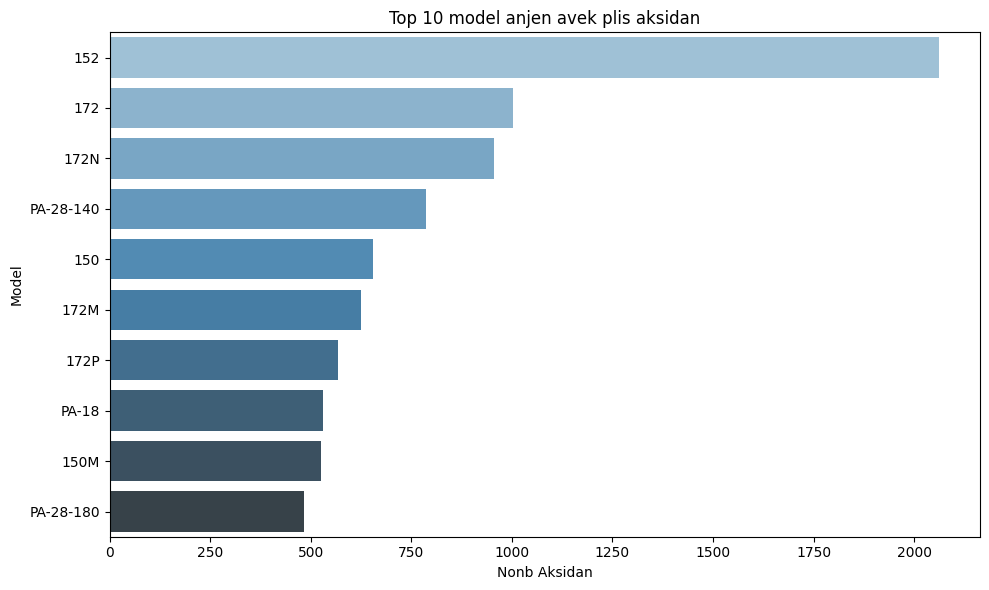

In [34]:
# Aksidan yo pa model
top_models = df['Model'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_models.index, x = top_models.values,palette = "Blues_d")
plt.title("Top 10 model anjen avek plis aksidan")
plt.xlabel("Nonb Aksidan")
plt.ylabel("Model")
plt.tight_layout()


C:\Users\Calixte\AppData\Local\Temp\ipykernel_18156\3227700771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_models.index, x = top_models.values,palette = "Blues_d")


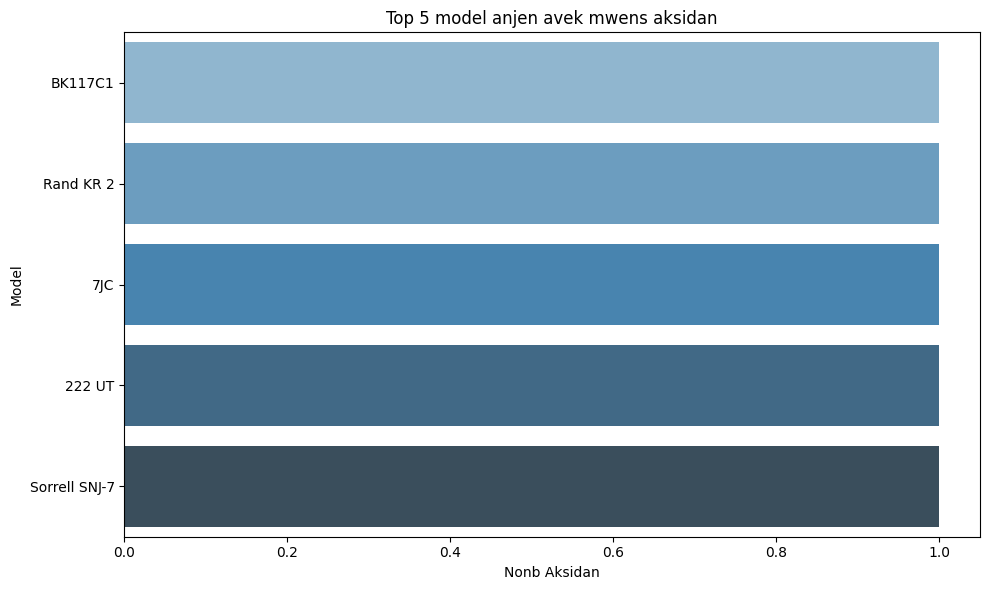

In [35]:
# Aksidan yo pa model
top_models = df['Model'].value_counts().tail(5)

plt.figure(figsize=(10,6))
sns.barplot(y=top_models.index, x = top_models.values,palette = "Blues_d")
plt.title("Top 5 model anjen avek mwens aksidan")
plt.xlabel("Nonb Aksidan")
plt.ylabel("Model")
plt.tight_layout()

C:\Users\Calixte\AppData\Local\Temp\ipykernel_18156\1971475680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_make.index, x = top_make.values,palette = "Blues_d")


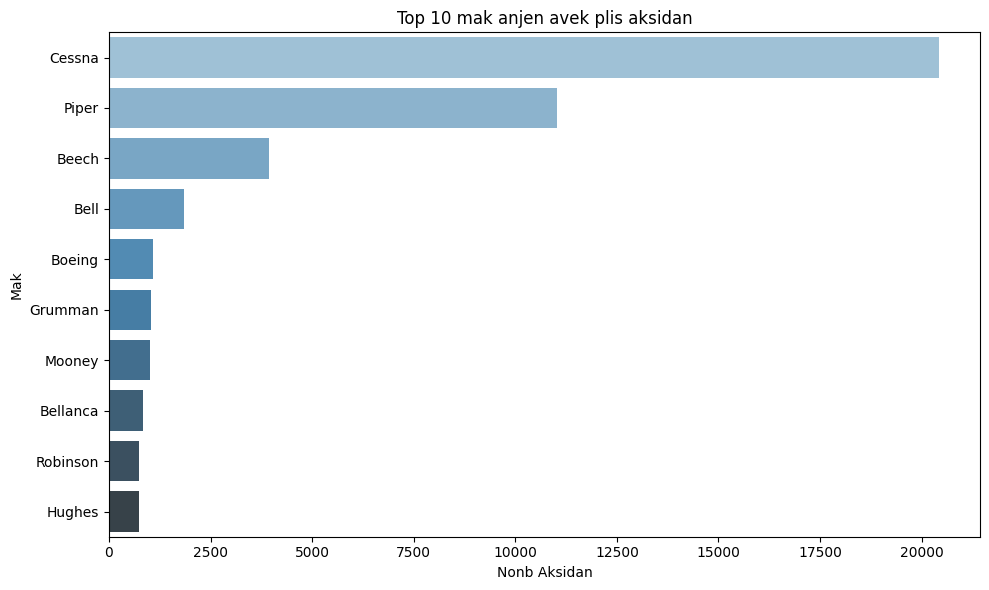

In [43]:
# Aksidan yo pa mak
top_make = df['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_make.index, x = top_make.values,palette = "Blues_d")
plt.title("Top 10 mak anjen avek plis aksidan")
plt.xlabel("Nonb Aksidan")
plt.ylabel("Mak")
plt.tight_layout()

C:\Users\Calixte\AppData\Local\Temp\ipykernel_18156\3201660715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_make.index, x = top_make.values,palette = "Blues_d")


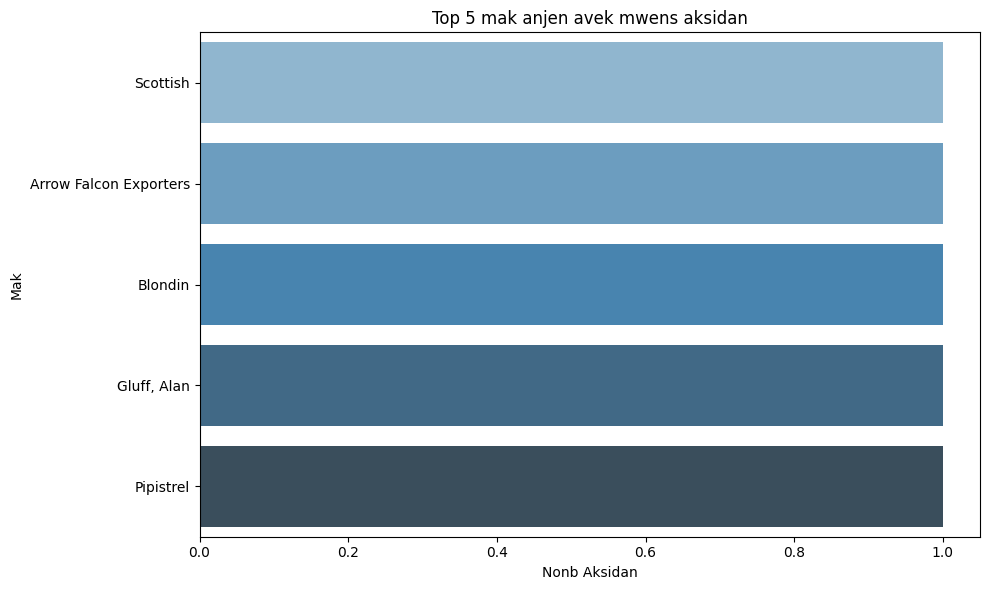

In [44]:
# Aksidan yo pa mak
top_make = df['Make'].value_counts().tail(5)

plt.figure(figsize=(10,6))
sns.barplot(y=top_make.index, x = top_make.values,palette = "Blues_d")
plt.title("Top 5 mak anjen avek mwens aksidan")
plt.xlabel("Nonb Aksidan")
plt.ylabel("Mak")
plt.tight_layout()

Selon data yo, anviwon 50 000 ka aksidan yo konsene tip mote **Reciprocating** swa anviwon 87% aksidan yo. Pa kont **Turbo Jet** fe selman 549  aksidan ki reprezante mwens ke 1% aksidan yo. 
Nou remake tou, yon to elve aksidan nn nivo anjen ki gen selman yon sel mote swa anviwon 84% aksidan yo, pa kont sa ki gen 4 mote o konsene nn mwens ke 1% aksidan yo. E nou remake tou, tou o tan anjen an gen plis mote, se tou o tan li gen mwens chans poul fe aksidan.

Yon lot bo, 25% aksidan yo arive fet nan faz kote anjen yo bral ateri, 20% fet pandan anjen yo bral vole epi 17% pandan anjen yo fin vole. Data yo fe resoti ke anviwon 91% aksidan realize pandan gen bon kondisyon vizyel (VMC).

Pou fini nou remake ke kantite aksidan yo gen tandans pou redui avek tan kap pase.

C:\Users\Calixte\AppData\Local\Temp\ipykernel_18156\77025556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_accidents_engine.index, x = top_accidents_engine.values,palette = "Blues_d")


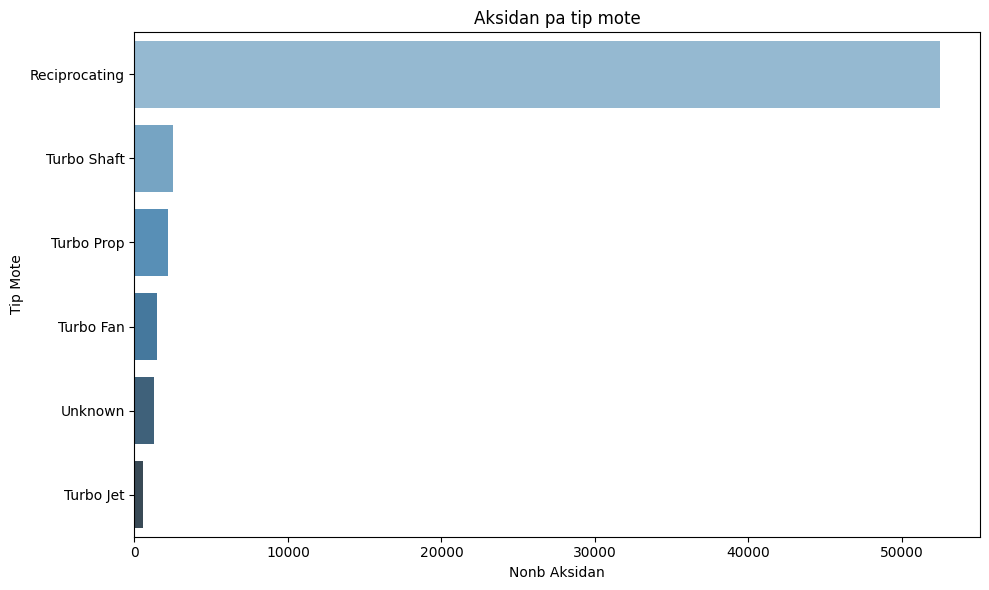

In [38]:
# Aksidan yo pa tip mote.
top_accidents_engine = df['Engine.Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(y=top_accidents_engine.index, x = top_accidents_engine.values,palette = "Blues_d")
plt.title("Aksidan pa tip mote")
plt.xlabel("Nonb Aksidan")
plt.ylabel("Tip Mote")
plt.tight_layout()

C:\Users\Calixte\AppData\Local\Temp\ipykernel_18156\2861416851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_accidents_by_N_Eng.index, x = top_accidents_by_N_Eng.values,palette = "Blues_d")


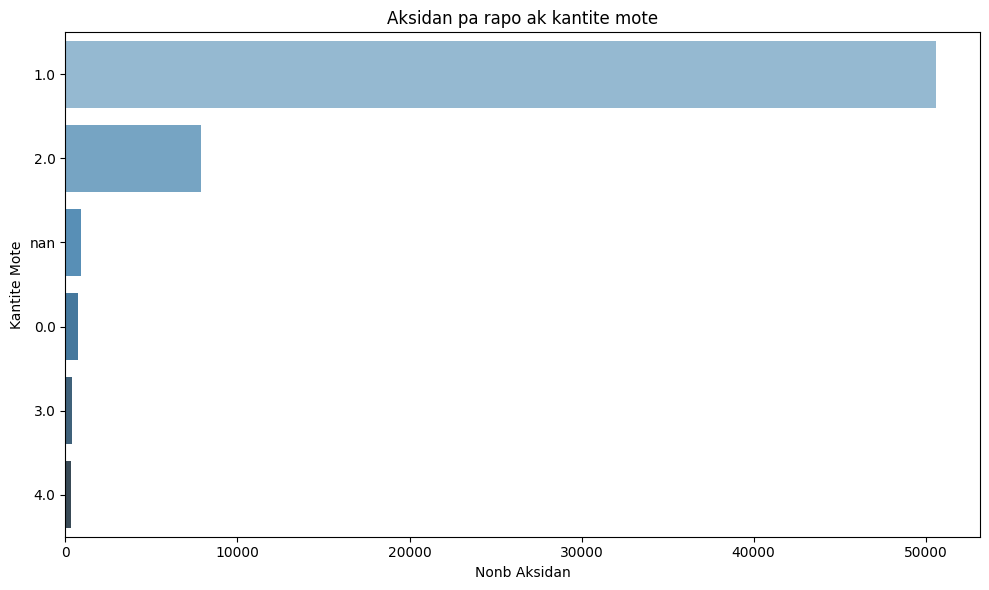

In [39]:
# Aksidan yo pa model
df['Number.of.Engines'] = df['Number.of.Engines'].astype(str)
top_accidents_by_N_Eng = df['Number.of.Engines'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(y=top_accidents_by_N_Eng.index, x = top_accidents_by_N_Eng.values,palette = "Blues_d")
plt.title("Aksidan pa rapo ak kantite mote")
plt.xlabel("Nonb Aksidan")
plt.ylabel("Kantite Mote")
plt.tight_layout()

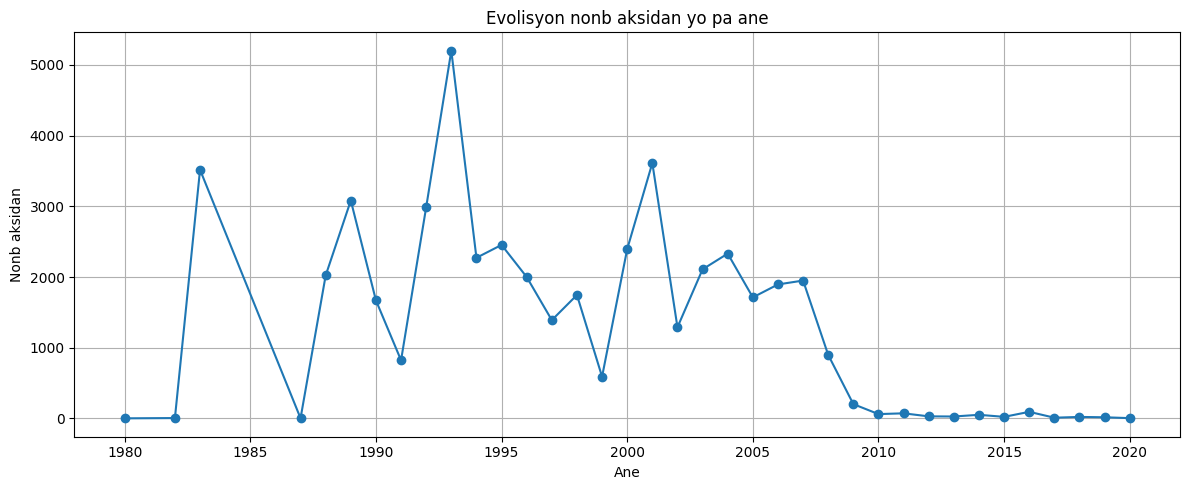

In [40]:
# Tandans Aksidan yo atrave tan
df['Year'] = df['Publication.Date'].dt.year
accidents_per_year = df['Year'].value_counts().sort_index()


plt.figure(figsize=(12,5))
accidents_per_year.plot(kind='line',marker = 'o')
plt.title("Evolisyon nonb aksidan yo pa ane")
plt.xlabel('Ane')
plt.ylabel("Nonb aksidan")
plt.grid(True)
plt.tight_layout()




C:\Users\Calixte\AppData\Local\Temp\ipykernel_18156\220136074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=phase_counts.index,x = phase_counts.values, palette='Set2')


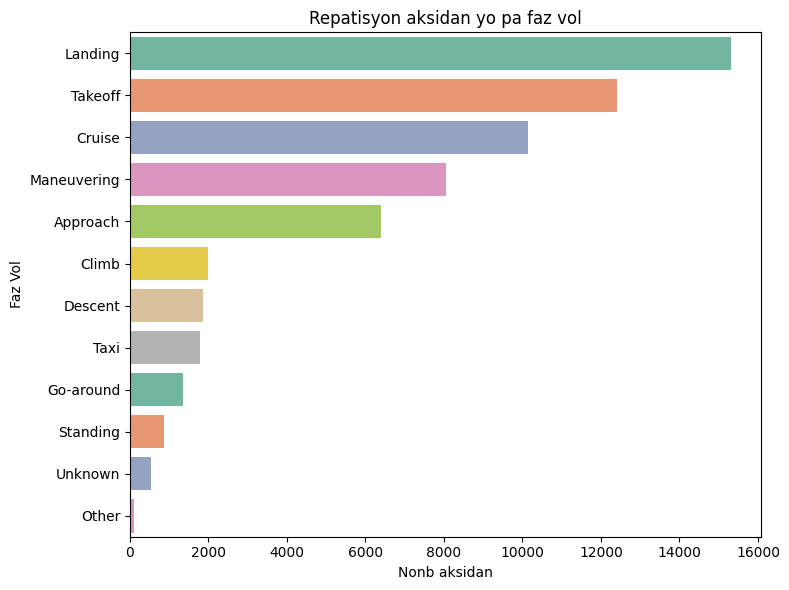

In [41]:
phase_counts = df['Broad.phase.of.flight'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(y=phase_counts.index,x = phase_counts.values, palette='Set2')
plt.title("Repatisyon aksidan yo pa faz vol")
plt.xlabel("Nonb aksidan")
plt.ylabel("Faz Vol")
plt.tight_layout()


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

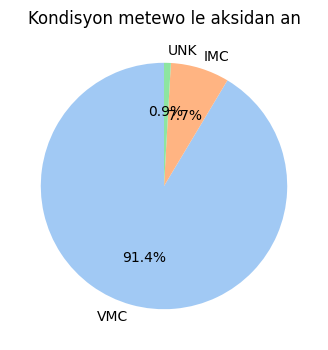

In [42]:
# Kondisyon meteyo le aksidan an
weather_counts = df['Weather.Condition'].value_counts()


plt.figure(figsize=(6,4))
weather_counts.plot(kind = 'pie', autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('pastel'))
plt.ylabel('')
plt.title('Kondisyon metewo le aksidan an')
plt.tight_layout


## Konklizyon


Sou baz data sa yo, nou bral fe kek rekomandasyon a pati prenant yo.

1. Sou baz nonb aksidan sou peryod lan, nou ka di anjen ki pi sur yo se Model **Sorrell,SNJ-7,222 UT,7JC,Rand KR 2**, men pa kont sa ki mwens sur yo se model **152**, **172N**, **172**. Pa kont Mak ki pi sur yo se pito **Pipistrel,Gluff Alan,Blondin,Arrow Falcon Exporters.Scottish**. Sa ki mwens sur yo se Mak **Cessna**, **Piper** epi **Beech**.

2. Selon done yo toujou, tip mote ki enplike nan plis aksidan se mak mote **Reciprocating**, yon lot bo mote ki enplike nan mwens aksidan an se **Turbo Jet**.

3. Yon tandans ki enpotan nan data aksidan yo, se tou o tan anjen an gen plis mote se mwens chans li genyen poul fe aksidan. Ki donk yon obje ki gen 4 mote pi sur ke youn ki gen selman 2 mote.


N.B: Nou panse rezilta analiz sa yo ka gen ladan yo kek bye, pa egzanp data sa yo genyen selman aksidan yo. Nou pa konnen nonb vol total yo, pase ke yon anjen ka fe plis aksidan se pase ke li vole plis. Remak sa valab tou pou model, mak anjen yo avek mak mote yo tou.




